### Q13) Implement Linear Regression problem based on multiple features/variables on “Advertising” dataset. For example, based on the budget of TV, Radio and Newspaper, predict the overall sales.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [2]:
print("\n-*-*-*-*-*-*-*-* Multiple Linear Regression Model *-*-*-*-*-*-*-*-*-*-*\n")
dataset = pd.read_csv('Advertising.csv')
print("Dataset chosen:")
dataset.head()


-*-*-*-*-*-*-*-* Multiple Linear Regression Model *-*-*-*-*-*-*-*-*-*-*

Dataset chosen:


,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [3]:
print("---For Multiple Linear Regression---")
df = dataset[['TV','radio','newspaper', 'sales']]
df.head()

---For Multiple Linear Regression---


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
x = dataset.drop(['sales', 'Unnamed: 0'], axis=1)
y = np.array(df['sales']).reshape(-1, 1)
  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3,random_state=4)
MLR = LinearRegression()
MLR.fit(x_train, y_train)

print('Intercept: ',round(MLR.intercept_[0],4))
print('Coefficient: ',round(MLR.coef_[0][0],5))

print("\nThe linear model is: y = {:.5} + {:.5}*x1 + {:.5}*x2 + {:.5}*x3".format(MLR.intercept_[0], MLR.coef_[0][0], MLR.coef_[0][1], MLR.coef_[0][2]))

y_pred=MLR.predict(x_test)
y=MLR.predict(np.array([275,55.7,80.6]).reshape(1,-1))
print("\nPredicted Value for the sale of radios: ", y)

print("\nAccuracy Score: ", round(MLR.score(x_test,y_test),5))
print('Mean Squared Error: ', round(metrics.mean_squared_error(y_test,y_pred),4))
print('Root Mean Square Error: ', round(np.sqrt(metrics.mean_squared_error(y_test,y_pred)),4))

print('Train Score :', round(MLR.score(x_train,y_train),5))
print('Test Score:', round(MLR.score(x_test,y_test),5))

Intercept:  3.0906
Coefficient:  0.04533

The linear model is: y = 3.0906 + 0.045334*x1 + 0.17716*x2 + 0.0055385*x3

Predicted Value for the sale of radios:  [[25.87155831]]

Accuracy Score:  0.91272
Mean Squared Error:  2.2238
Root Mean Square Error:  1.4912
Train Score : 0.88901
Test Score: 0.91272


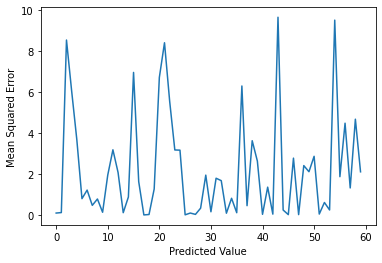

In [5]:
errors = list()
for i in range(len(y_test)):
    E1 = (y_test[i] - y_pred[i])**2
    errors.append(E1)
plt.plot(errors)
plt.xlabel('Predicted Value')
plt.ylabel('Mean Squared Error')
plt.show()